In [ ]:
import random

class Player():
  def __init__(self, name, congnitive_ability, init_coins):
    self.name= name

    assert congnitive_ability>=0 and congnitive_ability<=1
    self.congnitive_ability= congnitive_ability # number between 0 and 1

    self.round_scores=[]
    self.current_round_score=0
    self.coins= init_coins
    self.history=[init_coins]
    self.cognitive_history=[]

  def play(self, hardness):
    noise = random.uniform(-0.1, 0.1)
    return ((1-hardness)*self.congnitive_ability)+noise

  def pay(self, coins):
    if self.coins < coins:
      coins_to_reduce = self.coins
      self.coins = 0
    else:
      coins_to_reduce = coins
      self.coins -= coins

    return coins_to_reduce

  def collect(self, coins):
    self.coins += coins

  def update_history(self):
    self.history.append(self.coins)
    self.cognitive_history.append(self.congnitive_ability)

class Dice():
  # this class represents two dices.
  def __init__(self):
    self.dice_hardness = [0.5, 0.6, 0.2, 0.1, 0.7, 0.8]
    self.dice = [1,2,3,4,5,6]

  def roll(self):
    current_number = random.choice(self.dice)
    current_hardness = random.choice(self.dice_hardness)
    return current_number, current_hardness

class Game():
  def __init__(self, name, players, max_num_rounds):
    self.name= name
    self.players= players # an array of Player class (3 players)
    self.max_num_rounds= max_num_rounds
    self.current_round= 1
    self.dice= Dice()
    self.turn= 0 # represent the index of player turn index in self.players

    # print(f"GAME {self.name}")
    # for player in self.players:
    #   print(f"Player {player.name} has {player.coins} coins")

  def play_one_round(self):
    current_number, current_hardness = self.dice.roll()

    players_in_act_in_current_round = []
    for index_in_this_game, player in enumerate(self.players):
      if index_in_this_game != self.turn:
        players_in_act_in_current_round.append({
            "player_index_in_this_game": index_in_this_game,
            "score": player.play(current_hardness)
        })

    players_in_act_in_current_round.sort(key=lambda x: x["score"], reverse=False)

    not_active_player = self.players[self.turn]
    looser = self.players[players_in_act_in_current_round[0]['player_index_in_this_game']]

    paid_coins = looser.pay(current_number) # the player who lost in this round should pay
    not_active_player.collect(paid_coins) # the not-active player collect

    # update history
    for player in self.players:
      player.update_history()

    if self.current_round >= self.max_num_rounds:
      self.players.sort(key=lambda x: x.coins, reverse=True)
      return self.players

    self.current_round += 1
    self.update_turn()
    return f"GAME {self.name}, not-active player {not_active_player.name}, looser {looser.name}, paid_coins {paid_coins}"

  def update_turn(self):
    self.turn = (self.turn+1)
    if self.turn == len(self.players):
      self.turn = 0

  def reset_game(self):
    self.current_round=1

In [ ]:
MAX_NUMBER_OF_ROUNDS= 10
# COGNITIVE_ABILITY_DECREASE_RATE= 0.5
# COGNITIVE_ABILITY_COMPENSATION_RATE_PER_ROUND= 0.05
# NUMBER_OF_ROUND_FOR_COMPENSATION= 10

COGNITIVE_ABILITY_DECREASE_RATE= 0.5
COGNITIVE_ABILITY_COMPENSATION_RATE_PER_ROUND= 0.05
NUMBER_OF_ROUND_FOR_COMPENSATION= 10

players= []

for player_index in range(0, 9):
  players.append(Player(
      name=f"player_{player_index}",
      congnitive_ability=random.uniform(0.5, 1),
      init_coins=20
  ))

games= []
for game_index in range(0,3):
  start_index = game_index * 3
  end_index = start_index + 3
  games.append(Game(
      name=f"game_{game_index}",
      players=players[start_index:end_index],
      max_num_rounds=MAX_NUMBER_OF_ROUNDS
  ))

winner_in_first_round = []
winner_in_last_round = []

for number_of_play_games in range(0, 10):
  print(f"___ ___ ___ number_of_play_games {number_of_play_games+1} ___ ___ ___ ")
  for round in range(0, MAX_NUMBER_OF_ROUNDS):
    # print(f"\n\n\n ___ ___ ___ ROUND {round+1} ___ ___ ___ ")
    for game in games:
      # compensate cognitive ability of winners
      if number_of_play_games !=0 and round>=0 and round<NUMBER_OF_ROUND_FOR_COMPENSATION:
        game.players[2].congnitive_ability += COGNITIVE_ABILITY_COMPENSATION_RATE_PER_ROUND

      report = game.play_one_round()
      if isinstance(report, str):
        # print("report")
        # print(report)
        pass
      else:
        # print(f"game {game.name} is over")
        # for player in report:
        #   print(f"player.name {player.name} coins {player.coins}")
        # print("\n\n\n")
        pass

  if number_of_play_games == 0:
    winner_in_first_round = [games[0].players[0].name, games[1].players[0].name, games[2].players[0].name]
  elif number_of_play_games == 9:
    winner_in_last_round = [games[0].players[0].name, games[1].players[0].name, games[2].players[0].name]

  game_one_winner = games[0].players[0]
  # decrease winners cognitive ability
  games[1].players[0].congnitive_ability -= COGNITIVE_ABILITY_DECREASE_RATE
  games[2].players[0].congnitive_ability -= COGNITIVE_ABILITY_DECREASE_RATE
  game_one_winner.congnitive_ability -= COGNITIVE_ABILITY_DECREASE_RATE

  # Rotating group
  games[0].reset_game()
  games[0].players=[games[0].players[1], games[0].players[2], games[1].players[0]]

  games[1].reset_game()
  games[1].players=[games[1].players[1], games[1].players[2], games[2].players[0]]

  games[2].reset_game()
  games[2].players=[games[2].players[1], games[2].players[2], game_one_winner]

print("\n")

print("winner_in_first_round")
print(winner_in_first_round)

print("winner_in_last_round")
print(winner_in_last_round)

___ ___ ___ number_of_play_games 1 ___ ___ ___ 
___ ___ ___ number_of_play_games 2 ___ ___ ___ 
___ ___ ___ number_of_play_games 3 ___ ___ ___ 
___ ___ ___ number_of_play_games 4 ___ ___ ___ 
___ ___ ___ number_of_play_games 5 ___ ___ ___ 
___ ___ ___ number_of_play_games 6 ___ ___ ___ 
___ ___ ___ number_of_play_games 7 ___ ___ ___ 
___ ___ ___ number_of_play_games 8 ___ ___ ___ 
___ ___ ___ number_of_play_games 9 ___ ___ ___ 
___ ___ ___ number_of_play_games 10 ___ ___ ___ 


winner_in_first_round
['player_0', 'player_4', 'player_6']
winner_in_last_round
['player_6', 'player_5', 'player_4']


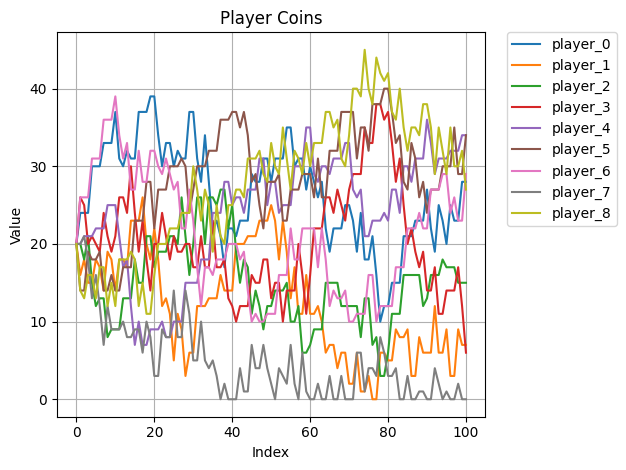

In [ ]:
import matplotlib.pyplot as plt

histories = []
labels = []
for player in players:
  histories.append(player.history)
  labels.append(player.name)

for i, row in enumerate(histories):
    plt.plot(row, label=labels[i])

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Player Coins')
plt.legend()
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()


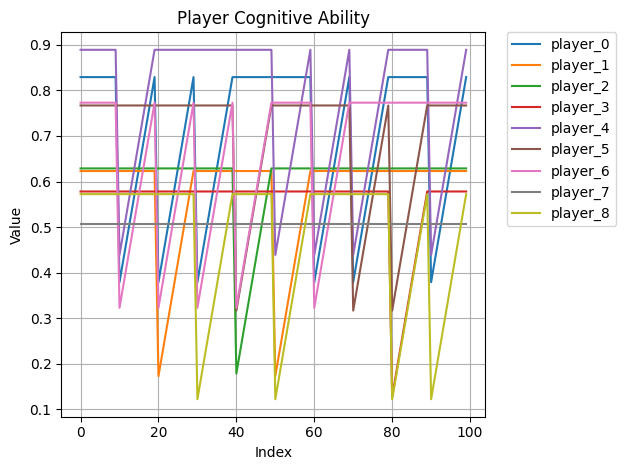

In [ ]:
import matplotlib.pyplot as plt

cognitive_histories = []
labels = []
for player in players:
    cognitive_histories.append(player.cognitive_history)
    labels.append(player.name)

for i, row in enumerate(cognitive_histories):
    plt.plot(row, label=labels[i])

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Player Cognitive Ability')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()